In [221]:
#imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier #Random forest can pick up non-linearities
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.impute import SimpleImputer


#Random forests can handle regression and classification tasks
#much more robust to outliers -> no need for normalization

In [222]:
#load dataset
matches = pd.read_csv("matches.csv", index_col = 0)
matches.shape
matches.head()



,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [223]:
#Data preprocessing
#38 matches played each season, 20 teams, two seasons
#We should have 1520 rows but only have 1389 rows
matches["team"].value_counts()

team
Manchester United           72
West Ham United             72
Newcastle United            72
Brighton and Hove Albion    72
Southampton                 72
Tottenham Hotspur           71
Manchester City             71
Leeds United                71
Wolverhampton Wanderers     71
Arsenal                     71
Crystal Palace              71
Burnley                     71
Chelsea                     70
Aston Villa                 70
Leicester City              70
Everton                     70
West Bromwich Albion        38
Fulham                      38
Liverpool                   38
Sheffield United            38
Brentford                   34
Norwich City                33
Watford                     33
Name: count, dtype: int64

In [224]:
matches[matches["team"] == "Liverpool"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


In [225]:
#Data cleaning
#machine learning algs can only work with numeric data types
print(matches.dtypes)

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object


In [226]:
#Create predictors
#convert from string -> categories -> numbers
matches["date"] = pd.to_datetime(matches["date"])
matches["venue_code"] = matches["venue"].astype("category").cat.codes #encoding
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "",regex = True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek


#Create Target
matches["target"] = (matches["result"] == "W").astype("int") #true -> 1, false -> 0
print(matches.dtypes)


date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
venue_code                int8
opp_code                  int8
hour                     int64
day_code                 int32
target                   int64
dtype: o

In [227]:
#Train initial machine learning market
#Instantiate RandomForest
rf = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, random_state = 1)


#split dataset
train = matches[matches["date"] < '2022-01-01']
test = matches[matches["date"] > '2022-01-01']

#create predictors
predictors = ["venue_code", "opp_code", "hour", "day_code"]


#fit model
rf.fit(train[predictors],train["target"])
y_pred = rf.predict(test[predictors])






In [228]:
#Evaluate first model


combined = pd.DataFrame(dict(actual = test["target"], prediction = y_pred))
print(combined)
pd.crosstab(index=combined["actual"], columns = combined["prediction"])

#Evaluate accuracy of first model using accuracy
accuracy = accuracy_score(test["target"], y_pred)
print("Accuracy of initial model:", accuracy)

#Evaluate accuracy of first model using precision
precision = precision_score(test["target"], y_pred)
print("Precision of initial model:", precision)



    actual  prediction
31       1           0
32       0           0
34       1           0
35       1           1
37       0           1
..     ...         ...
33       0           0
34       0           0
35       1           0
36       0           0
37       0           1

[276 rows x 2 columns]
Accuracy of initial model: 0.6123188405797102
Precision of initial model: 0.4745762711864407


Best hyperparameters: {'min_samples_split': 13, 'n_estimators': 343}
Accuracy of tuned model:  0.6195652173913043
Precision of tuned model:  0.49019607843137253
Recall:  0.2403846153846154


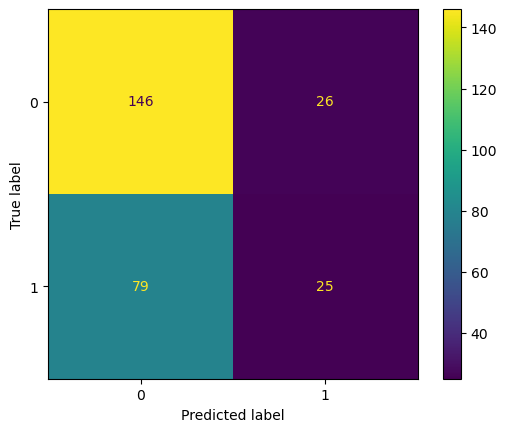

In [229]:
#Improve model

#Hyperparameter tuning
#tune n_estimators and max_depth
param_dist = {'n_estimators': randint(50,500),
              'min_samples_split': randint(1,20)}

rf = RandomForestClassifier()

#Use random search to find best hyperparameters
rand_search = RandomizedSearchCV(rf,param_dist,n_iter = 5, cv = 7)

#fit
rand_search.fit(train[predictors], train["target"])

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

#use the best model
y_pred = best_rf.predict(test[predictors])
cm = confusion_matrix(test["target"], y_pred)
print(ConfusionMatrixDisplay(confusion_matrix=cm).plot())

#evaluate accuracy of best model
print("Accuracy of tuned model: ", accuracy_score(test["target"], y_pred))
print("Precision of tuned model: ", precision_score(test["target"], y_pred))
print("Recall: ", recall_score(test["target"], y_pred))





In [230]:
#slight improvement in performance -> can also improve using rolling averages
#smooths out short-term, random fluctuations to reveal and highlight the longer-term trends and patterns in the data
#reduces noise
grouped_matches = matches.groupby("team")
group = grouped_matches.get_group("Manchester City")

def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3,closed = 'left').mean() #ignore current week
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group
    

In [231]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]
new_cols


['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [232]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x,cols,new_cols))
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

In [233]:
matches_rolling = matches_rolling.droplevel('team')

In [234]:

matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [235]:
matches_rolling.index = range(matches_rolling.shape[0]) #unique values for each index

In [236]:
matches_rolling



,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [237]:

def make_predictions(data,predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    best_rf.fit(train[predictors], train["target"])
    preds = best_rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual = test["target"], prediction = preds, index = test.index))
    precision = precision_score(test["target"], preds)
    accuracy = accuracy_score(test["target"], preds)
    return combined, precision, accuracy

In [238]:
combined, precision, accuracy = make_predictions(matches_rolling, predictors + new_cols)

In [239]:
print("New precision: ",  precision)
print("New accuracy: ", accuracy)

New precision:  0.5952380952380952
New accuracy:  0.6521739130434783


In [240]:
print(combined)


      actual  prediction  index
55         0           1     55
56         1           0     56
57         1           0     57
58         1           1     58
59         1           1     59
...      ...         ...    ...
1312       1           0   1312
1313       0           0   1313
1314       1           0   1314
1315       0           0   1315
1316       0           0   1316

[276 rows x 3 columns]


In [241]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index = True, right_index = True)

In [242]:
combined

,actual,prediction,index,date,team,opponent,result
55,0,1,55,2022-01-23,Arsenal,Burnley,D
56,1,0,56,2022-02-10,Arsenal,Wolves,W
57,1,0,57,2022-02-19,Arsenal,Brentford,W
58,1,1,58,2022-02-24,Arsenal,Wolves,W
59,1,1,59,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...,...
1312,1,0,1312,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,1313,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,1314,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,1315,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


In [243]:
#combining home and away predictions
#normalize names
class MissingDict(dict):
    __missing__ = lambda self, key: key
    
map_values = {
    "Brighton and Hove Albion": "Brighton",
    "Manchester United": "Manchester Utd",
    "Tottenham Hotpur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}

mapping = MissingDict(**map_values)
mapping["West Ham United"]

combined["new_team"] = combined["team"].map(mapping)

merged = combined.merge(combined,left_on = ["date", "new_team"], right_on = ["date", "opponent"])
merged


,actual_x,prediction_x,index_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,index_y,team_y,opponent_y,result_y,new_team_y
0,0,1,55,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,287,Burnley,Arsenal,D,Burnley
1,1,0,56,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,1305,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,57,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,157,Brentford,Arsenal,L,Brentford
3,1,1,58,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,1308,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,59,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,1138,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,0,1312,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,495,Everton,Wolves,L,Everton
228,0,0,1313,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,601,Leeds United,Wolves,W,Leeds United
229,1,0,1314,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,132,Aston Villa,Wolves,L,Aston Villa
230,0,0,1315,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,909,Newcastle United,Wolves,W,Newcastle United


In [244]:
#algorithm predicted one team to win and another team to lose
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()

actual_x
1    16
0    10
Name: count, dtype: int64